## MNIST Classification using Deep Neural Network

### PART 1.1

#### Here I have trained a fully connected net for MNIST Classification.
#### This fully connected network has 5 hidden layers with 1024 hidden units each.
#### To initialize the weights I have used Xavier initialization technique taught in class. 
#### This initialization coupled with batch normalization and Adam Optimizer gives an accuracy of 98.3% on test data.

#### Import required libraries

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib notebook

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="6"
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.33

In [3]:
tf.set_random_seed(1234)

In [4]:
# load mnist data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# get 1000 test samples to get the predicted labels and create plots for parts 1.3 - 1.8
test_samples, test_labels = mnist.test.next_batch(1000)

In [6]:
# set the number of hidden units in each layer
num_hidden_1 = 1024 # hidden layer 1
num_hidden_2 = 1024 # hidden layer 2
num_hidden_3 = 1024 # hidden layer 3
num_hidden_4 = 1024 # hidden layer 4
num_hidden_5 = 1024 # hidden layer 5
num_features = 784 # input features
num_output = 10 # number of outputs

In [7]:
x = tf.placeholder('float', shape=[None, num_features]) # placeholder for the input data samples
y = tf.placeholder('float', shape=[None, num_output]) #placeholder for input data labels

In [8]:
# Batch size
batch_size = 100

In [9]:
# epsilon value for batch normalization transform
epsilon = 1e-3

In [13]:
def fully_connected_net(data):
    # Weights and bias initialization
    # Here weights are initialized using Xavier Initialization technique
    weights = {
        'w1': tf.Variable(tf.random_normal(shape=[num_features, num_hidden_1],stddev=tf.sqrt(2/(num_features+num_hidden_1)))),
        'w2': tf.Variable(tf.random_normal(shape=[num_hidden_1, num_hidden_2],stddev = tf.sqrt(2/(num_hidden_1+ num_hidden_2)))),
        'w3': tf.Variable(tf.random_normal(shape=[num_hidden_2, num_hidden_3],stddev = tf.sqrt(2/(num_hidden_2 + num_hidden_3)))),
        'w4': tf.Variable(tf.random_normal(shape=[num_hidden_3, num_hidden_4],stddev = tf.sqrt(2/(num_hidden_4 + num_hidden_3)))),
        'w5': tf.Variable(tf.random_normal(shape=[num_hidden_4, num_hidden_5],stddev = tf.sqrt(2/(num_hidden_4 + num_hidden_5)))),
        'wout': tf.Variable(tf.random_normal(shape=[num_hidden_5, num_output],stddev = tf.sqrt(2/(num_hidden_5+num_output))))
    }
    biases = {
        'bout': tf.Variable(tf.random_normal([num_output]))
    }
    # Layer 1 with batch normalization
    z1 = tf.matmul(data,weights['w1'])
    batch_mean1, batch_var1 = tf.nn.moments(z1, [0])
    #scale and beta (shift)
    scale1 = tf.Variable(tf.ones([1024]))
    beta1 = tf.Variable(tf.zeros([1024]))
    z1_hat = tf.nn.batch_normalization(z1, batch_mean1, batch_var1,beta1, scale1,epsilon)
    l1 = tf.nn.relu(z1_hat)
        
    # Layer 2 with batch normalization
    z2 = tf.matmul(l1,weights['w2'])
    batch_mean2, batch_var2 = tf.nn.moments(z2,[0])
    scale2 = tf.Variable(tf.ones([1024]))
    beta2 = tf.Variable(tf.zeros([1024]))
    z2_hat = tf.nn.batch_normalization(z2,batch_mean2,batch_var2,beta2,scale2,epsilon)
    l2 = tf.nn.relu(z2_hat)
    
    # Layer 3 with batch normalization
    z3 = tf.matmul(l2,weights['w3'])
    batch_mean3, batch_var3 = tf.nn.moments(z3,[0])
    scale3 = tf.Variable(tf.ones([1024]))
    beta3 = tf.Variable(tf.zeros([1024]))
    z3_hat = tf.nn.batch_normalization(z3,batch_mean3,batch_var3,beta3,scale3,epsilon)
    l3 = tf.nn.relu(z3_hat)
    
    
    
    # Layer 4 with batch normalization
    z4 = tf.matmul(l3,weights['w4'])
    batch_mean4, batch_var4 = tf.nn.moments(z4,[0])
    scale4 = tf.Variable(tf.ones([1024]))
    beta4 = tf.Variable(tf.zeros([1024]))
    z4_hat = tf.nn.batch_normalization(z4,batch_mean4,batch_var4,beta4,scale4,epsilon)
    l4 = tf.nn.relu(z4_hat)
    
    
    # Layer 5 with batch normalization
    z5 = tf.matmul(l4,weights['w5'])
    batch_mean5, batch_var5 = tf.nn.moments(z5,[0])
    scale5 = tf.Variable(tf.ones([1024]))
    beta5 = tf.Variable(tf.zeros([1024]))
    z5_hat = tf.nn.batch_normalization(z5,batch_mean5,batch_var5,beta5,scale5,epsilon)
    l5 = tf.nn.relu(z5_hat)
    
    
    # Output Layer
    output = tf.add(tf.matmul(l5, weights['wout']) , biases['bout'])
    return l1, l2, l3, l4, l5, output

In [14]:
def train_network(x):
    
    ## train the network and get the output of each layer including the output layer.
    layer1_out, layer2_out, layer3_out, layer4_out, layer5_out, output = fully_connected_net(x)
    
    ## get the predcited digits for test samples
    prediction = tf.nn.softmax(logits =output) 
    prediction_class = tf.argmax(prediction,1) 
    
    # loss function to minimize during optimization
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output, labels = y))
    
    #Use AdamOptimizer to train the dataset and minize above loss function
    train_step = tf.train.AdamOptimizer(learning_rate= 0.001).minimize(loss)
    
    #Run for 20 epochs
    epochs = 20
    with tf.Session(config=config) as sess:
    #with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                batch_x, batch_y = mnist.train.next_batch(batch_size)
                _, err = sess.run([train_step, loss], feed_dict={x: batch_x, y: batch_y})
                epoch_loss += err
            #print('Epoch ',epoch, ' completed out of ',epochs, 'loss: ', epoch_loss )
        
        # calculate the accuracy of the acuracy of this model
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        # Evaluate the accuracy on the Test data
        print ('Accuracy on test data is: ', accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
        
        # Get the output of all layers for 1000 test samples for parts 1.3 to 1.8
        layer1_out, layer2_out, layer3_out,layer4_out, layer5_out, test_pred_class = sess.run([layer1_out, layer2_out, 
                                                                                               layer3_out,layer4_out, 
                                                                                               layer5_out, prediction_class],
                                                                                              feed_dict = {x: test_samples})
        
        return layer1_out, layer2_out, layer3_out,layer4_out, layer5_out, test_pred_class

In [15]:
## Train the network and get the output of each layer for 1000 test samples.
layer1_out, layer2_out, layer3_out,layer4_out, layer5_out, test_pred_class = train_network(x)

Accuracy on test data is:  0.983


### Part 1.3: Plot the input images of 10 predictions for each class

In [16]:
import numpy as np

In [17]:
# Create a list to store the indices of 10 inputs for each predcited class
indexes = []
for i in range(10):
    indexes.append(np.ndarray.tolist((np.where(test_pred_class == i)[0][:10])))

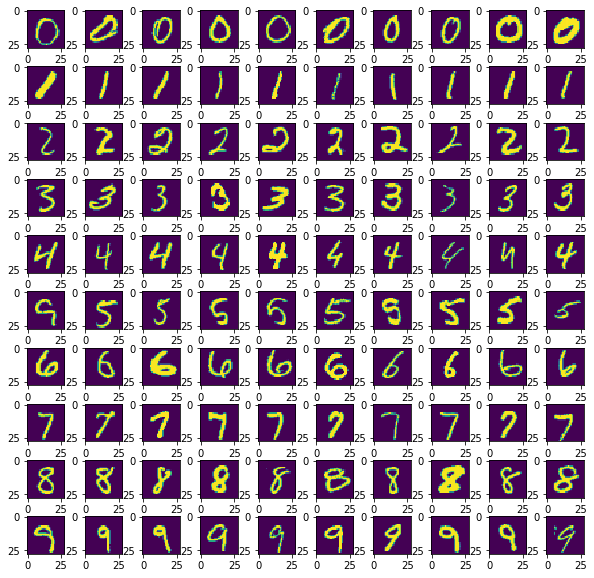

In [18]:
# A 10 by 10 plot of the input test images for the predicted class.
# First row shows the images with predicted class 0, and the last row shows the images with predicted class 9.
fig, axes = plt.subplots(10, 10,figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(10):
    for j in range(10):
        indx = indexes[i][j]
        axes[i,j].imshow(test_samples[indx,:].reshape((28,28)))
        

### Part 1.4: Repeat previous step for second to last hidden layer

In [19]:
## randomly select 10 features from the 1024 in hidden layer 5
np.random.seed(0)
hidden_out_5 =np.argmax( layer5_out[:,np.random.randint(1024,size=10)] , axis= 1)
hidden_index_5 = []
for i in range(10):
    hidden_index_5.append(np.ndarray.tolist((np.where(hidden_out_5 == i)[0][:10])))
#hidden_out_5.shape
#hidden_index_5


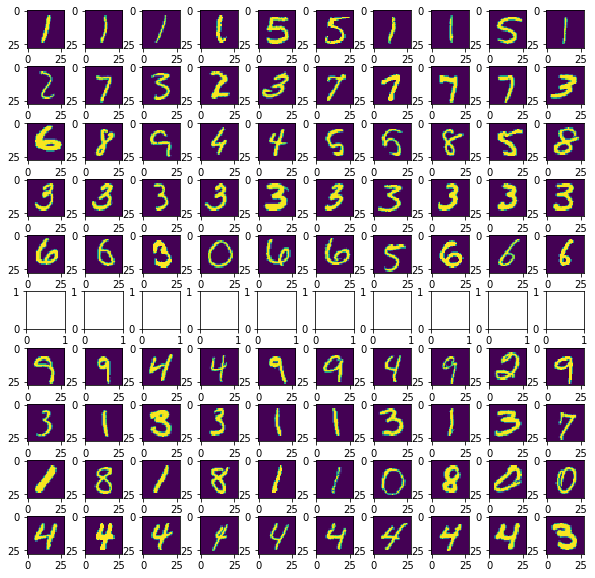

In [20]:
# A 10 by 10 plot of the input test images for the predicted class.
# First row shows the images with predicted class 0, and the last row shows the images with predicted class 9.
fig, axes = plt.subplots(10, 10,figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(10):
    for j in range(10):
        if j < len(hidden_index_5[i]):
            indx = hidden_index_5[i][j]
            axes[i,j].imshow(test_samples[indx,:].reshape((28,28)))
                #plt.show()

#### The plots of the output layer shows all the labels correctly classified where as in the second to last layer only the images in third row seem to be correctly classified but none of the other images are correctly classified. An ideal situation might be a better feature seperation in the second to last layer.

### Part 1.5 - 1.6: PCA and TSNE on 1000 test samples

#### PCA

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
# Standardize the test samples before applying PCA and TSNE on the test samples
test_samples = StandardScaler().fit_transform(test_samples)

In [23]:
pca = PCA(n_components= 2)
pcomp = pca.fit_transform(test_samples)

In [24]:
#pcomp.shape
test_lb =[]
for i  in range(len(test_labels)):
    test_lb.append(np.argmax(test_labels[i]))

(1000,)


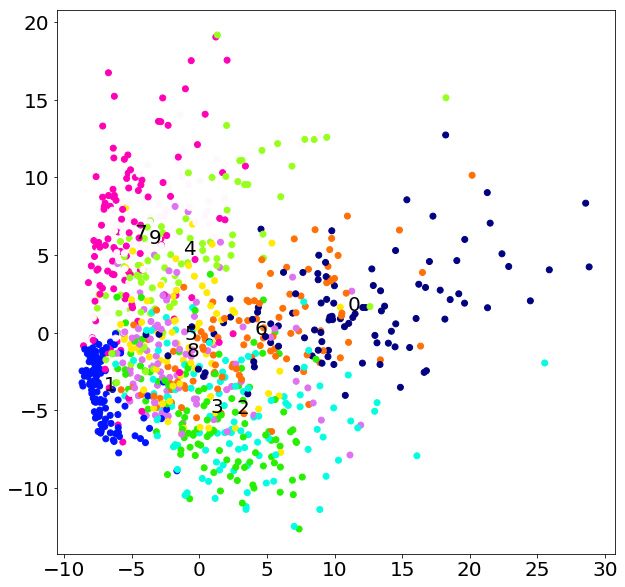

In [31]:
fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(pcomp[:,0],pcomp[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

test_index = np.argmax(test_labels,axis=1)
print(test_index.shape)
mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = pcomp[indx]
   # print(sub_samples.shape)
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))



#### TSNE

In [32]:
from sklearn.manifold import TSNE

In [33]:
test_samples_tsne = TSNE(n_components=2).fit_transform(test_samples)

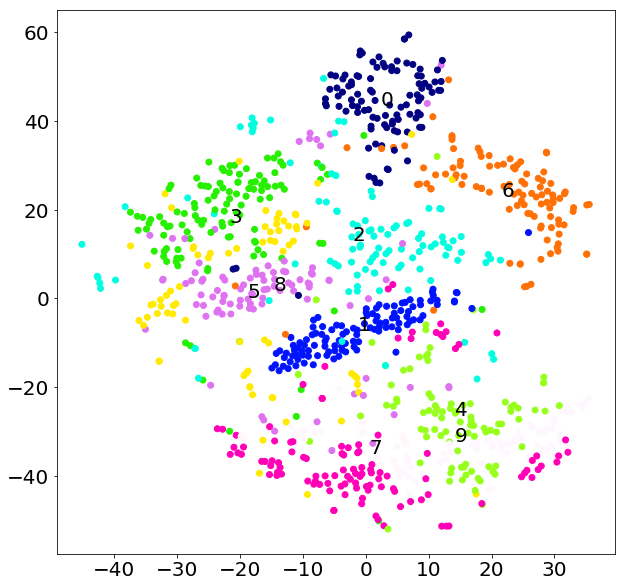

In [34]:
fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(test_samples_tsne[:,0],test_samples_tsne[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

test_index = np.argmax(test_labels,axis=1)
#print(test_index.shape)
mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = test_samples_tsne[indx]
   # print(sub_samples.shape)
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

#### Looking at the PCA on input samples, the 10 classes are not easily seperable. 
#### Looking at the TSNE on input samples, some of the classes look more easily seperable than others. Example there's an overlap between classes 4 and 9 making them difficult to distinguish.

### Part 1.7: PCA on hidden layer 1

In [35]:
layer1_out = StandardScaler().fit_transform(layer1_out)
pcomp1 = pca.fit_transform(layer1_out)

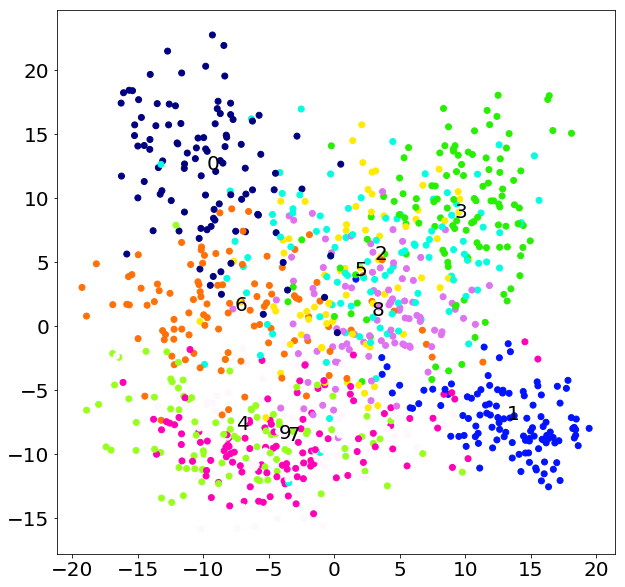

In [36]:
fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(pcomp1[:,0],pcomp1[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

#test_index = np.argmax(test_labels,axis=1)
#print(test_index.shape)
mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = pcomp1[indx]
   # print(sub_samples.shape)
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

#### PCA on the output of first hidden layer improves the seperability of the data as compared to PCA on the raw data.

### Part 1.7: TSNE on hidden layer 1

In [37]:
layer1_tsne = TSNE(n_components=2).fit_transform(layer1_out)

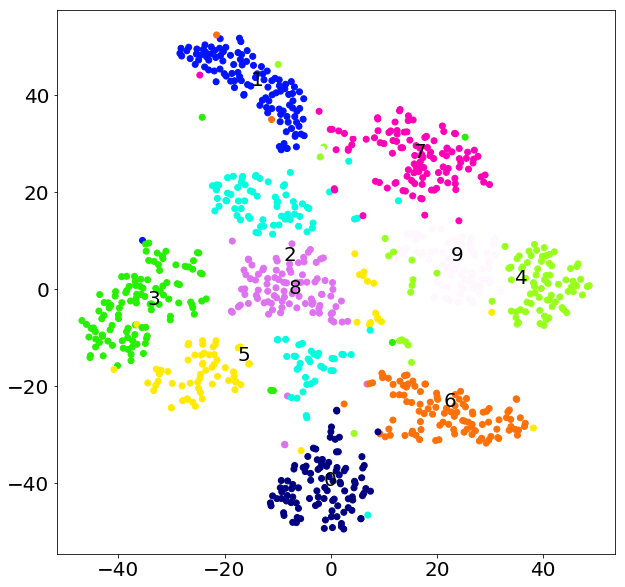

In [38]:
fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(layer1_tsne[:,0],layer1_tsne[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

#test_index = np.argmax(test_labels,axis=1)
#print(test_index.shape)
mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = layer1_tsne[indx]
   # print(sub_samples.shape)
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

#### TSNE on the first hidden layer has improved the separability between the classes as compared to TSNE on the raw data

### Part 1.8: PCA and TSNE on all layers

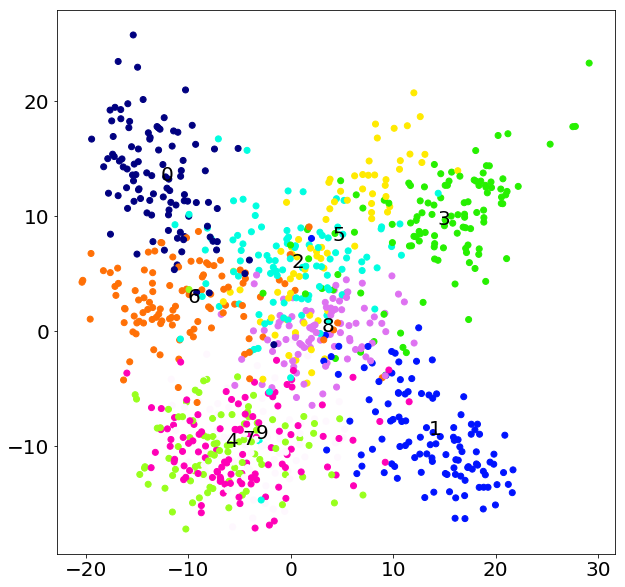

In [39]:
# PCA on Hidden layer 2 output
layer2_out = StandardScaler().fit_transform(layer2_out)
pcomp2 = pca.fit_transform(layer2_out)

fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(pcomp2[:,0],pcomp2[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = pcomp2[indx]
   # print(sub_samples.shape)
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

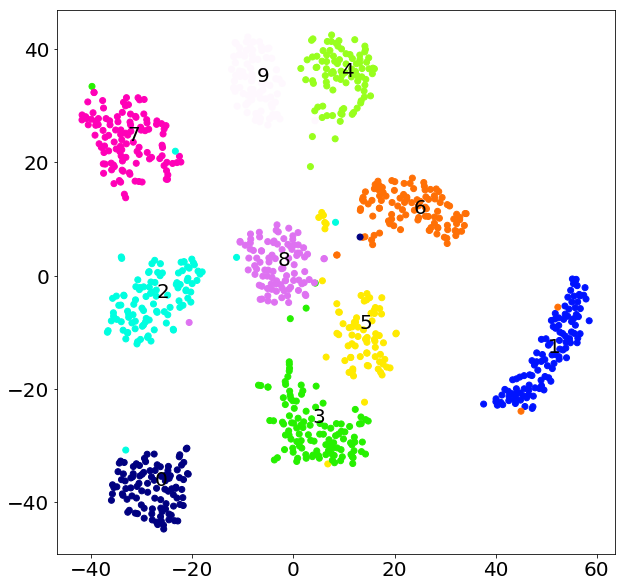

In [40]:
# TSNE on Hidden layer 2 output
layer2_tsne = TSNE(n_components=2).fit_transform(layer2_out)
fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(layer2_tsne[:,0],layer2_tsne[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = layer2_tsne[indx]
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

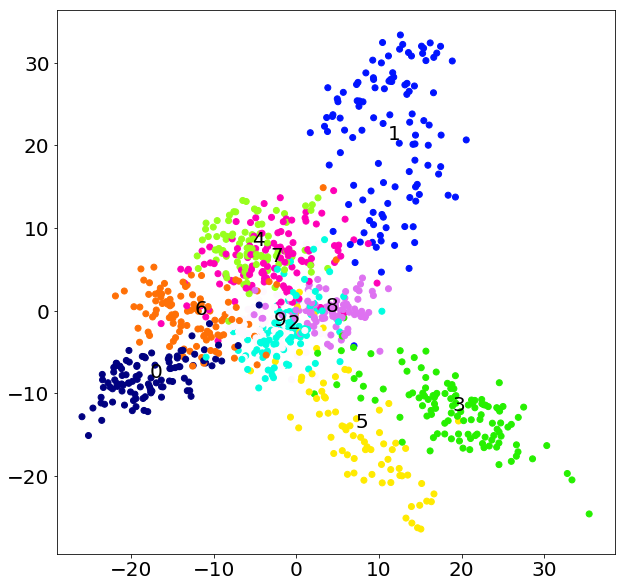

In [41]:
# PCA on Hidden layer 3 output
layer3_out = StandardScaler().fit_transform(layer3_out)
pcomp3 = pca.fit_transform(layer3_out)

fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(pcomp3[:,0],pcomp3[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = pcomp3[indx]
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

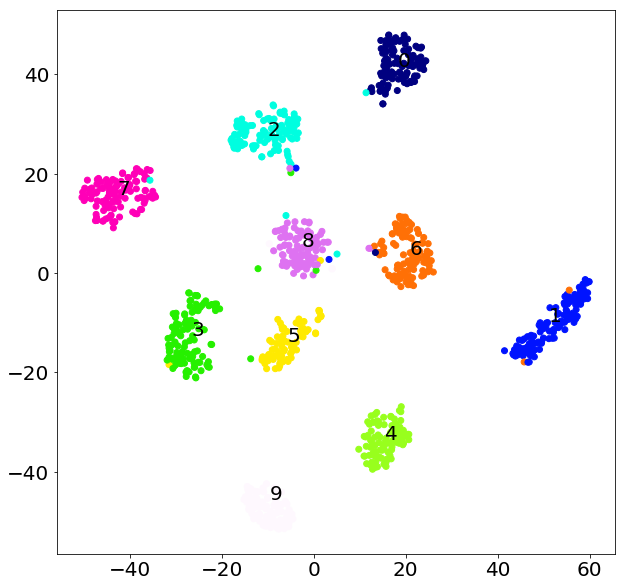

In [42]:
# TSNE on Hidden layer 3 output
layer3_tsne = TSNE(n_components=2).fit_transform(layer3_out)
fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(layer3_tsne[:,0],layer3_tsne[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = layer3_tsne[indx]
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

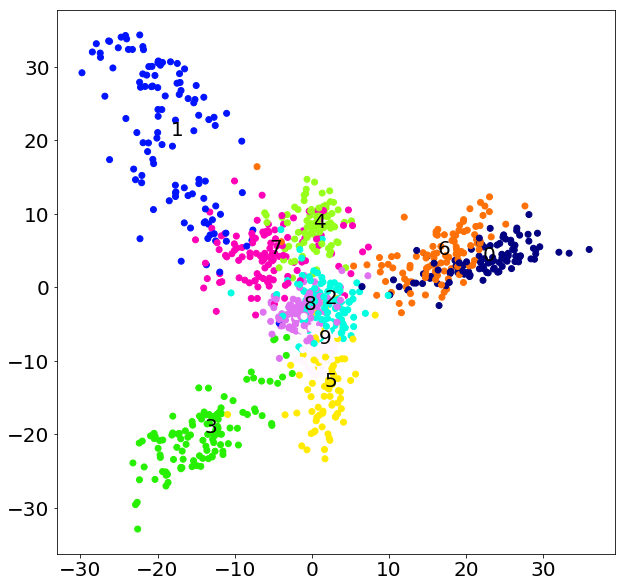

In [43]:
# PCA on Hidden layer 4 output
layer4_out = StandardScaler().fit_transform(layer4_out)
pcomp4 = pca.fit_transform(layer4_out)

fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(pcomp4[:,0],pcomp4[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = pcomp4[indx]
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

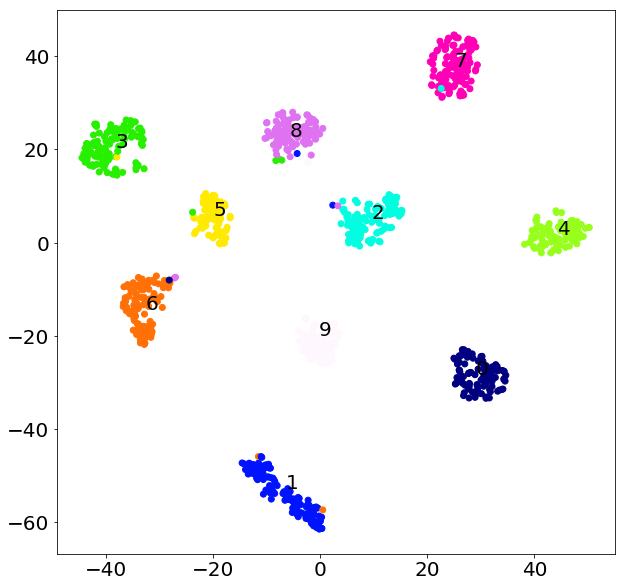

In [44]:
# TSNE on Hidden layer 4 output
layer4_tsne = TSNE(n_components=2).fit_transform(layer4_out)
fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(layer4_tsne[:,0],layer4_tsne[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = layer4_tsne[indx]
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

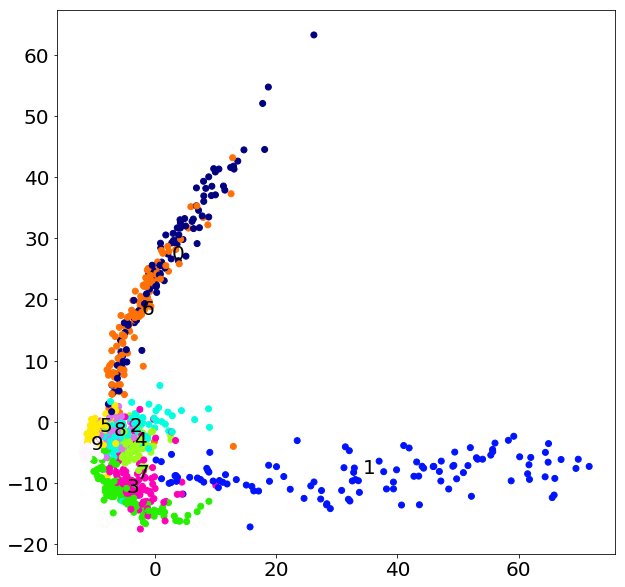

In [45]:
# PCA on Hidden layer 5 output
layer5_out = StandardScaler().fit_transform(layer5_out)
pcomp5 = pca.fit_transform(layer5_out)

fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(pcomp5[:,0],pcomp5[:,1], c =test_lb,cmap=plt.cm.get_cmap('Set2', 10) )

#test_index = np.argmax(test_labels,axis=1)
#print(test_index.shape)
mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = pcomp5[indx]
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

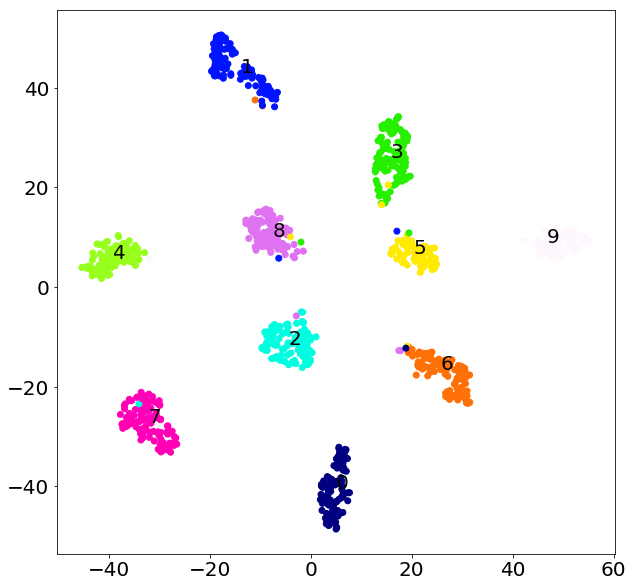

In [47]:
# TSNE on Hidden layer 5 output
layer5_tsne = TSNE(n_components=2).fit_transform(layer5_out)
fig= plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
#plt.rcParams['font.weight'] = 'bold'
ax = fig.add_subplot(111)
ax.scatter(layer5_tsne[:,0],layer5_tsne[:,1], c =test_lb,cmap=plt.cm.get_cmap('gist_ncar', 10) )

mean = []
for i in range(10):
    indx = np.ndarray.tolist(np.where(test_index == i)[0])
    sub_samples = layer5_tsne[indx]
    x,y = (np.mean(sub_samples, axis =0))
    ax.annotate(str(i), xy=(x,y))

#### TSNE on each successive hidden layer improves the separability of the 10 classes and makes them easily idetifiable.
#### PCA on each successive hidden layer did not could not improve the separability of the 10 classes beyond a certain extent.